# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0


In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.2.3')
    requirements_generator.add_package('scikit-learn','1.6.1')
    requirements_generator.add_package('torch','2.6.0')
    requirements_generator.add_package('h5py','3.12.1')
    requirements_generator.add_package('numpy','2.2.3')
    requirements_generator.add_package('seaborn','0.13.2')
    requirements_generator.add_package('matplotlib','3.10.0')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.24-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 8))
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 5.3 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.4 MB/s 

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
from pathlib import Path
from os import path
import h5py
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import (f1_score,precision_score,recall_score,
                             accuracy_score,average_precision_score,
                             balanced_accuracy_score,confusion_matrix)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_model_peformance_pytorch')
    manifest_genenerator.set_ait_description('pytorchの分類モデルの推論結果から、テストデータのaccuracy、AP(average precision)、balanced accuracyを算出し、精度を評価する。\nさらに各クラスのF値を算出し、各クラスに対する強弱を分析する。また、F値のマクロ・マイクロ・加重平均を算出することで、少数クラスの性能やモデル全体の総合的な性能、データの不均衡を考慮した全体の性能を確認・評価できる。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_model_peformance_pytorch')
    manifest_genenerator.set_ait_version('0.10')
    manifest_genenerator.add_ait_keywords('h5')
    manifest_genenerator.add_ait_keywords('accuracy')
    manifest_genenerator.add_ait_keywords('fscore')
    manifest_genenerator.add_ait_keywords('balanced accuracy')
    manifest_genenerator.add_ait_keywords('average precision')
    manifest_genenerator.add_ait_keywords('pytorch')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/C-1機械学習モデルの正確性')
    
    #### Inventories
    ds_req = manifest_genenerator.format_ait_inventory_requirement(format_=['h5'])
    model_req = manifest_genenerator.format_ait_inventory_requirement(format_=['pth'])

    manifest_genenerator.add_ait_inventories(name='test_dataset',
                                             type_='dataset',
                                             description="HDF5形式のテストデータセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される多次元配列を含むデータセット\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット\n\nファイル構造:\n sample.h5\n ├(1)入力データセット\n └(2)ラベルデータセット\n",
                                             requirement=ds_req)
    manifest_genenerator.add_ait_inventories(name='trained_model',
                                             type_='model',
                                             description="torch.jit.save関数を使用しTorchScript形式で保存されたモデルデータ。入力と出力の要素数はtest_dataset inventoryと一致させる",
                                             requirement=model_req)
    
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='input_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(1)のファイル名', 
                                            default_val='x_test')
    
    manifest_genenerator.add_ait_parameters(name='label_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(2)のファイル名', 
                                            default_val='y_test')
    #### Measures
    manifest_genenerator.add_ait_measures(name='accuracy', 
                                          type_='float', 
                                          description='モデルの正解率.値は推論の精度が良いほど1に近づく', 
                                          structure='single',
                                          min='0',
                                          max='1')
        
    manifest_genenerator.add_ait_measures(name='average_precision', 
                                          type_='float', 
                                          description='クラスごとで平均を取った適合率.値は推論の精度が良いほど1に近づく', 
                                          structure='single',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_measures(name='balanced_accuracy', 
                                          type_='float', 
                                          description='モデルのBalanced accuracy\nデータセットに偏りがある場合、こちらの指標のほうがモデルの精度を適切に測ることができる可能性があります.値は推論の精度が良いほど1に近づく', 
                                          structure='single',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_measures(name='F_Score_by_class', 
                                          type_='float', 
                                          description='各クラスごとのモデルのF値.値は推論の精度が良いほど1に近づく', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_measures(name='average_F_Score',
                                          type_='float',
                                          structure='sequence',
                                          description='テストデータセットのF値のマクロ平均値、マイクロ平均値、加重平均値.値は推論の精度が良いほど1に近づく',
                                          min='0',
                                          max='1')
    
    manifest_genenerator.add_ait_resources(name='Recall_Precision_Fscore_Table',
                                         type_='table', 
                                         description='テスト用データセットの各クラスごとの正解率、再現率、適合率、F値とそれぞれのマクロ平均の値、マイクロ平均の値、加重平均の値の表')
    
    manifest_genenerator.add_ait_resources(name='ConfusionMatrixHeatmap', 
                                           type_='picture', 
                                           description='混同行列(ヒートマップ)')
    #### Downloads
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='test_dataset',
                                        value='test_dataset/aug_test.h5')
    input_generator.add_ait_inventories(name='trained_model',
                                        value='trained_model/traced_model.pth')
    input_generator.set_ait_params("input_dataset_name", "data")
    input_generator.set_ait_params("label_dataset_name", "label")
    
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
def load_h5_test_data(h5_filename,x_name,y_name, batch_size=64):
    """
    h5形式のデータセットからデータローダを作成する
    parameter:
        h5_filename:ファイルのパス
        x_name:ファイル内にある画像データセットの名前
        y_name:ファイル内にある正解ラベルデータセットの名前
        batch_size:バッチサイズ
    return:
        dataloader:データローダ
    
    """
    with h5py.File(h5_filename,'r') as h5_file:
        images = h5_file[x_name][:]
        labels = h5_file[y_name][:]


    images = torch.tensor(images,dtype=torch.float32)
    labels = torch.tensor(labels,dtype=torch.long)

    dataset = TensorDataset(images,labels)
    dataloader = DataLoader(dataset,batch_size=batch_size,shuffle=False)
    return dataloader

In [12]:
# support function to do inference with given model and the dataloader.
@log(logger)
def inference(model,dataloader):
    """
    正解ラベルとモデルに画像を入力した時の予測ラベルと予測確率を返す関数
    """
    #モデルの予測ラベルと正解ラベルを入れるリスト
    y_pred_label = []
    y_pred_score = []
    y_true = []
    
    for i, (x,y) in enumerate(dataloader):
        with torch.no_grad():
            output = model(x)
            
        #モデルの予測ラベルとスコアを追加
        y_pred_score += output.tolist()
        y_pred_label += output.argmax(dim=1).tolist()
        
        #正解ラベルを追加
        y_true += y.tolist()
    #スコアをnumpy配列に変換した後予測確率に変換
    y_pred_score=np.array(y_pred_score)
    y_pred_score = F.softmax(torch.tensor(y_pred_score),dim=1).numpy()
    #モデルの予測ラベルのリストと正解ラベルのリストをnumpy配列に変換
    y_pred_label=np.array(y_pred_label)
    y_true=np.array(y_true)
    #配列を1次元に変換
    if len(y_true.shape)>1:
        y_true=y_true.squeeze()

        

    return y_true, y_pred_score,y_pred_label

In [13]:
# measurement functions. They consume inference results.
@log(logger)
@measures(ait_output, 'accuracy')
def measure_accuracy(y_true: List[int], y_pred: List[int]) -> float:
    return accuracy_score(y_true, y_pred)

@log(logger)
@measures(ait_output, 'average_precision')
def measure_average_precision(y_true: List[int], y_pred: List[int]) -> float:
    return average_precision_score(y_true, y_pred)

@log(logger)
@measures(ait_output, 'balanced_accuracy')
def measure_balanced_accuracy(y_true:List[int], y_pred: List[int]) -> float:
    return balanced_accuracy_score(y_true, y_pred)

In [14]:
@log(logger)
@resources(ait_output, path_helper, 'Recall_Precision_Fscore_Table',"Recall_Precision_Fscore_Table.csv")
def print_csv(f1_class_list,f1_ave_list,precision_class_list,precision_ave_list,recall_class_list,recall_ave_list,class_idx,file_path: str=None):
    """
    各クラスごとのF値、適合率、再現率とF値、適合率、再現率のマクロ平均、マイクロ平均、加重平均を表にして表示する関数
    parameter:
        f1_class_list:各クラスごとのF値のリスト
        f1_ave_list:F値のマクロ平均、マイクロ平均、加重平均のリスト
        precision_class_list:各クラスごとの適合率のリスト
        precision_ave_list:適合率のマクロ平均、マイクロ平均、加重平均のリスト
        recall_class_list:各クラスごとの再現率のリスト
        recall_ave_list:再現率のマクロ平均、マイクロ平均、加重平均のリスト
        class_idx:クラスのインデックス値のリスト
        file_path:表の保存先のパス
    return:
        value_tables:各クラスごとのF値、適合率、再現率とF値、適合率、再現率のマクロ平均、マイクロ平均、加重平均の表
    """
    value_table=pd.DataFrame({
        "Class":list(class_idx)+["Macro Avarage","Micro Avarage","Weighted Avarage"],
        "F1 Score":list(f1_class_list)+list(f1_ave_list),
        "Precision":list(precision_class_list)+list(precision_ave_list),
        "Recall":list(recall_class_list)+list(recall_ave_list)
        })
    print(value_table)
    value_table.to_csv(file_path,index=False)
    return value_table

In [15]:
@log(logger)
@measures(ait_output, 'F_Score_by_class', is_many=True)
def output_class_f1score(f1_class_list):
    """
    各クラスのF値をmeasurementとして出力するための関数
    parameter:
        f1_class_list:各クラスのF値のリスト
    return:
        np.array(f1_class_list):各クラスのF値のリストをnumpy配列に変換
    """
    return np.array(f1_class_list)
@log(logger)
@measures(ait_output, 'average_F_Score', is_many=True)
def output_ave_f1score(f1_ave_list):
    """
    マクロ平均、マイクロ平均、加重平均のF値をmeasurementとして出力するための関数
    parameter:
        f1_ave_list:マクロ平均、マイクロ平均、加重平均のF値のリスト
    return:
        np.array(f1_ave_list):マクロ平均、マイクロ平均、加重平均のF値のリストをnumpy配列に変換
    """
    return np.array(f1_ave_list)

In [16]:
# resource-producing function. This consumes inference results.
@log(logger)
@resources(ait_output, path_helper, 'ConfusionMatrixHeatmap', 'confusion_matrix.png')
def save_confusion_matrix_heatmap(y_test, y_pred, file_path: str=None) -> None:

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')

    # save as png
    plt.savefig(file_path)

In [17]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [18]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    # load dataset
    test_h5_path = ait_input.get_inventory_path('test_dataset')
    test_input_dataset_name = ait_input.get_method_param_value('input_dataset_name')
    test_label_dataset_name = ait_input.get_method_param_value('label_dataset_name')
    #データローダの作成
    test_loader = load_h5_test_data(test_h5_path,test_input_dataset_name,test_label_dataset_name, batch_size=64)
    
    #モデルの読み込み
    trained_model = ait_input.get_inventory_path('trained_model')
    try:
        model = torch.jit.load(trained_model)
    except Exception as e:
        print(e)
    model.eval()
    
    y_true, y_pred_score,y_pred_label =inference(model,test_loader)
    #クラスのインデックス値のリストを作成
    class_idx = np.unique(np.concatenate([y_true,y_pred_label]))
    #各クラスごとのF値、適合率、再現率を計算
    f1_class_list = f1_score(y_true,y_pred_label,average=None,labels=class_idx)
    precision_class_list = precision_score(y_true,y_pred_label,average=None,labels=class_idx)
    recall_class_list = recall_score(y_true,y_pred_label,average=None,labels=class_idx)
    
    #F値のマクロ平均、マイクロ平均、加重平均を計算
    f1_macro = f1_score(y_true,y_pred_label,average='macro')
    f1_micro = f1_score(y_true,y_pred_label,average='micro')
    f1_weighted = f1_score(y_true,y_pred_label,average='weighted')
    #F値のマクロ平均、マイクロ平均、加重平均のリストを作成
    f1_ave_list=[f1_macro,f1_micro,f1_weighted]

    
    #適合率のマクロ平均、マイクロ平均、加重平均を計算
    precision_macro = precision_score(y_true,y_pred_label,average='macro')
    precision_micro = precision_score(y_true,y_pred_label,average='micro')
    precision_weighted = precision_score(y_true,y_pred_label,average='weighted')
    #適合率のマクロ平均、マイクロ平均、加重平均のリストを作成
    precision_ave_list=[precision_macro,precision_micro,precision_weighted]

    #再現率のマクロ平均、マイクロ平均、加重平均を計算
    recall_macro = recall_score(y_true,y_pred_label,average='macro')
    recall_micro = recall_score(y_true,y_pred_label,average='micro')
    recall_weighted = recall_score(y_true,y_pred_label,average='weighted')
    #再現率のマクロ平均、マイクロ平均、加重平均のリストを作成
    recall_ave_list=[recall_macro,recall_micro,recall_weighted]

    #各クラスごとのF値、適合率、再現率とF値、適合率、再現率のマクロ平均、マイクロ平均、加重平均の表を表示
    print_csv(f1_class_list,f1_ave_list,precision_class_list,precision_ave_list,recall_class_list,recall_ave_list,class_idx)
    
    #measurementの出力
    measure_accuracy(y_true, y_pred_label)
    #多クラス分類と2クラス分類で分岐
    if len(class_idx)>2:
        measure_average_precision(y_true, y_pred_score)
    else:
        measure_average_precision(y_true, y_pred_label)
    measure_balanced_accuracy(y_true, y_pred_label)
    output_class_f1score(f1_class_list)
    output_ave_f1score(f1_ave_list)
    
    save_confusion_matrix_heatmap(y_true, y_pred_label)
    
    move_log()

              Class  F1 Score  Precision    Recall
0                 0  0.563452   0.662687  0.490066
1                 1  0.464174   0.392105  0.568702
2     Macro Avarage  0.513813   0.527396  0.529384
3     Micro Avarage  0.518881   0.518881  0.518881
4  Weighted Avarage  0.527073   0.563536  0.518881


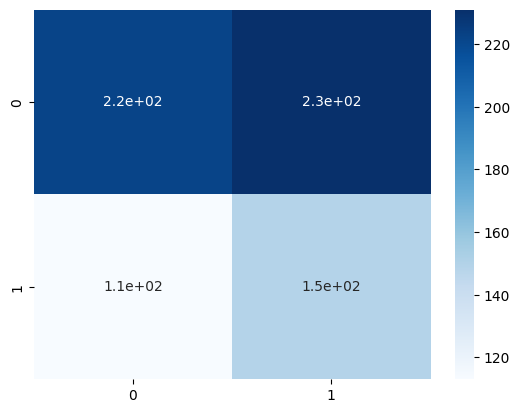

In [19]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [20]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2022'

In [21]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
